Answer with the type of test you would use (assume normal distribution):
        Is there a difference in grades of students on the second floor compared to grades of all students?
        

In [1]:
# grades of students on second floor
# grades of all students
# i have a continuos variable in grades ==> means test
# accross two different categories (means test as opposed to corr)
# the two groups: second floor students (subset)
# versus all students (population)
# subset v population: 1-sample
# non-directional difference: two tailed
# what I want here (presuming appropriate parameters)
# is a two-tailed, one sample t-test

Are adults who drink milk taller than adults who dont drink milk?
        

In [ ]:
# adults that drink milk
# adults that dont drink milk
# two sub groups: milk drinkers vs non milk drinkers
# two independent groups, no overlap ==> two sample
# one-tailed test because we want to know if one is specifcally
# taller than the other height_a > height_b
# a: one tailed, independent t-test

Is the the price of gas higher in texas or in new mexico?
        

In [2]:
# one-tailed: asking specifically if its *higher* in one state
# two-sample: two subgroups of texas and nm

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [4]:
# mean that is different across three different groups
# non-directional, because its across more than two groups
# we would use an anova test

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [6]:
# by instruction: alpha is set at 0.05
# two groups here:
# office #1:
# mean 90 day sale time, with a stdev 15
# office #2:
# mean 100 day sale time, stdev of 20 days

In [15]:
office_1 = stats.norm(90,15).rvs(40)

In [8]:
office_1

array([ 95.36831367,  53.43568144,  75.88781825,  60.97223215,
       108.25108683,  83.30302501,  75.03502572,  84.68834355,
        68.9889433 ,  78.39174171,  79.2164916 ,  97.05805229,
       109.55543407,  77.47611543,  75.81287557, 109.99729603,
       117.0054397 ,  46.77486189,  98.8199445 ,  93.57761442,
       106.05363447,  70.66612706,  73.69660899, 104.67456735,
       116.79043144,  97.78569254,  80.70180013,  84.04345936,
        74.2993029 , 102.24878884,  71.90218606,  83.21532586,
        83.15839453,  63.8929124 ,  96.43336795,  77.20130307,
        71.20545637,  88.52061819, 116.53896976, 104.9810575 ])

In [16]:
office_2 = stats.norm(100, 20).rvs(50)

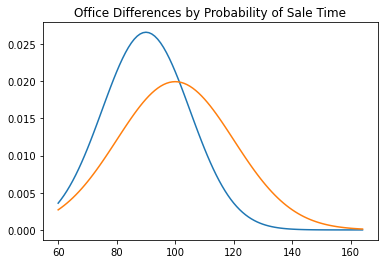

In [10]:
x = np.arange(60, 165)
y = stats.norm(90,15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.title('Office Differences by Probability of Sale Time')
plt.show()

H$_0$ : There is no difference in the average sale time of properties via office no 1 and office no 2

H$_a$ : There is a difference in the average sale time of properties between office no. 1 and office no. 2

In [11]:
# two tailed test, just checking for any difference in the means
# two sample test ==> two independent groups

In [13]:
office_1_mean = 90
office_1_stdv = 15
office_2_mean = 100
office_2_stdv = 20

In [21]:
# bonus: we can check for equal variance, 
# because we are populating values with rvs via the normal distribution
# object from scipy

In [29]:
# levene test:
# H0: there is equal variance between the two offices
# Ha: there is inequal variance between the two offices
stat, p_levene = stats.levene(office_1, office_2)

In [30]:
p_levene < α

False

In [66]:
# we fail to reject the null hypothesis,
# presume equal variance

In [31]:
t_stat, p_val = stats.ttest_ind_from_stats(
    mean1 = office_1_mean,
    std1 = office_1_stdv,
    nobs1 = 40,
    mean2 = office_2_mean,
    std2 = office_2_stdv,
    nobs2 = 50,
    equal_var=True)

In [32]:
α = 0.05

In [33]:
# two tailed test: I do not need to divide p by 2
if p_val < α:
    print('We can reject the null hypothesis, and suggest that there is a difference in mean sale time between the offices')
else:
    print('We failed to reject the null hypothesis')

We can reject the null hypothesis, and suggest that there is a difference in mean sale time between the offices


Load the mpg dataset and use it to answer the following questions:
        

In [34]:
mpg = data('mpg')

In [37]:
mpg['fe'] = stats.hmean((mpg['hwy'], mpg['cty']))

In [40]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
        

H$_0$ :  There is no difference in fuel efficency in 2008 cars vers 1999 cars

H$_a$ : There is a difference in fuel efficiency in 2008 cars versus 1999 cars

In [41]:
# parameters:
fe_1999 = mpg[mpg.year == 1999].fe
fe_2008 = mpg[mpg.year == 2008].fe

(array([23., 24., 17., 31., 12.,  5.,  2.,  0.,  1.,  2.]),
 array([12.69230769, 15.3218111 , 17.95131451, 20.58081792, 23.21032132,
        25.83982473, 28.46932814, 31.09883155, 33.72833496, 36.35783836,
        38.98734177]),
 <BarContainer object of 10 artists>)

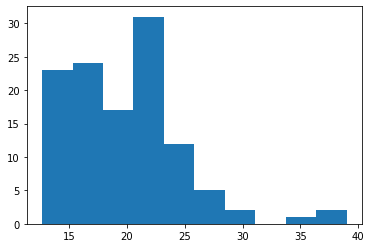

In [42]:
plt.hist(fe_1999)

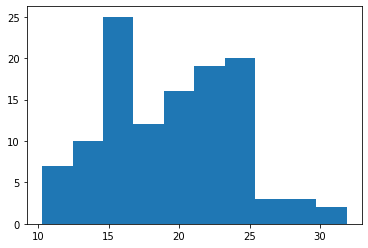

In [43]:
plt.hist(fe_2008)
plt.show()

In [44]:
# normality asserted vaguely by the CLT
# variance?
# lets check
stat, p_val = stats.levene(fe_1999, fe_2008)

In [ ]:
# p value is * not * less than the null hypothesis
# I fail to reject the null hypothesis
# so we presume equal variance

In [45]:
p_val < α

False

In [ ]:
# 1999 and 2008 are exclusive categories. independent

In [46]:
t_stat, p_val = stats.ttest_ind(fe_1999, fe_2008)

In [47]:
p_val < α

False

In [48]:
# we fail to reject the null hypothesis, which means
# that we cannot with certainty say that there is a
# difference in the means of the two groups

Are compact cars more fuel-efficient than the average car?
       

H$_0$ : Compact cars have a lower or equal average fuel efficiency compared to all cars

H$_a$ : Compact cars have a greater average fuel efficiency compared to all cars

In [49]:
# two things:
# compacts (sub group) versus all cars (population)
# one-sample ttest
# compacts fe > all cars fe 
# one-tailed ttest

In [50]:
μth = mpg.fe.mean()

In [52]:
t_stat, p_val = stats.ttest_1samp(
    mpg[mpg['class'] == 'compact'].fe,
    μth)

In [54]:
if ((p_val / 2 ) < α) and (t_stat > 0):
    print('We can reject the null hypothesis!')
    print('There is evidence that the altnerative that we posited is valid!')
else:
    print('we fail to reject the null hypothesis')
    

We can reject the null hypothesis!
There is evidence that the altnerative that we posited is valid!


Do manual cars get better gas mileage than automatic cars?

H$_0$ : Manual cars receive worse or equal gas mileage compared to automatic vehicls

H$_a$ : Manual cars receive better gas mileage than automatic vehicles

In [55]:
# group a: manual cars
# group b: automatic cars
# independent sub-groups:
# ttest_ind

In [56]:
manual_fe = mpg[mpg.trans.str.startswith('man')].fe
auto_fe = mpg[mpg.trans.str.startswith('auto')].fe

In [57]:
# quick levene test:
# h0: equal variance
# ha: inequal variance
stats.levene(manual_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [58]:
# fail to reject h0: presume equal variance

In [60]:
t_stat, p_val = stats.ttest_ind(manual_fe, auto_fe)

In [61]:
p_val

5.510464610044005e-06

In [62]:
# p is less than our alpha (0.05)

In [63]:
# t_stat?

In [64]:
t_stat

4.652577547151351

In [65]:
# t_stat > 0: 

In [ ]:
# we met both conditions, so we can reject h0
# and say that there is a difference